# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

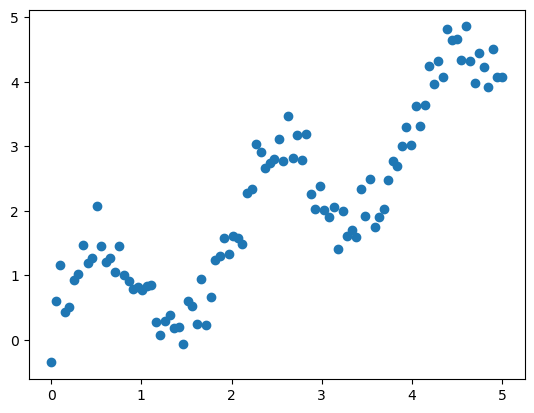

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5154796035813071


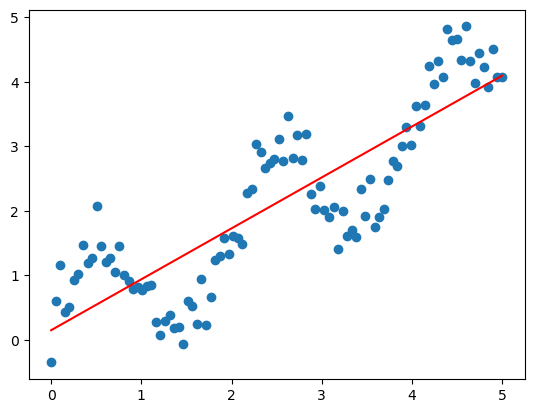

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

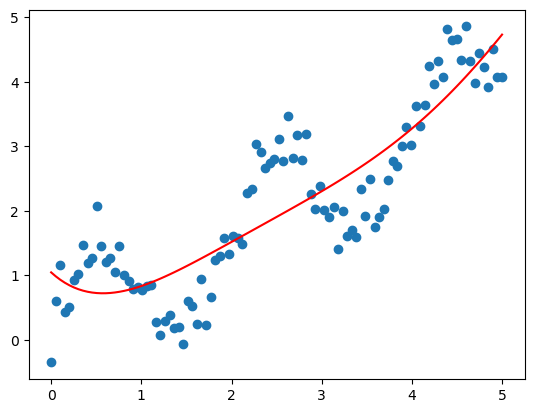

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.27753748  1.52455575 -0.54556113  0.09188815 -0.00552719]
interception:  1.044529249528563


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.04452925, 0.98382624, 0.93048741, 0.8841123 , 0.84431439,
       0.81072084, 0.78297228, 0.76072261, 0.74363878, 0.73140054,
       0.72370026, 0.7202427 , 0.72074477, 0.72493536, 0.73255507,
       0.74335602, 0.75710164, 0.77356641, 0.79253571, 0.81380553,
       0.83718231, 0.86248268, 0.88953328, 0.91817049, 0.94824027,
       0.9795979 , 1.0121078 , 1.04564327, 1.0800863 , 1.11532733,
       1.15126506, 1.18780623, 1.22486535, 1.26236457, 1.30023339,
       1.33840845, 1.37683336, 1.41545843, 1.45424049, 1.49314263,
       1.53213402, 1.57118968, 1.61029027, 1.64942184, 1.68857564,
       1.72774792, 1.76693965, 1.80615639, 1.84540796, 1.88470835,
       1.92407539, 1.96353061, 2.00309896, 2.04280864, 2.08269088,
       2.12277969, 2.16311165, 2.20372572, 2.24466299, 2.28596649,
       2.32768095, 2.36985258, 2.41252887, 2.45575837, 2.49959045,
       2.54407512, 2.58926277, 2.63520397, 2.68194927, 2.72954896,
       2.77805286, 2.82751008, 2.87796885, 2.92947625, 2.98207

In [15]:
regr_poly.predict(X_poly)

array([1.04452925, 0.98382624, 0.93048741, 0.8841123 , 0.84431439,
       0.81072084, 0.78297228, 0.76072261, 0.74363878, 0.73140054,
       0.72370026, 0.7202427 , 0.72074477, 0.72493536, 0.73255507,
       0.74335602, 0.75710164, 0.77356641, 0.79253571, 0.81380553,
       0.83718231, 0.86248268, 0.88953328, 0.91817049, 0.94824027,
       0.9795979 , 1.0121078 , 1.04564327, 1.0800863 , 1.11532733,
       1.15126506, 1.18780623, 1.22486535, 1.26236457, 1.30023339,
       1.33840845, 1.37683336, 1.41545843, 1.45424049, 1.49314263,
       1.53213402, 1.57118968, 1.61029027, 1.64942184, 1.68857564,
       1.72774792, 1.76693965, 1.80615639, 1.84540796, 1.88470835,
       1.92407539, 1.96353061, 2.00309896, 2.04280864, 2.08269088,
       2.12277969, 2.16311165, 2.20372572, 2.24466299, 2.28596649,
       2.32768095, 2.36985258, 2.41252887, 2.45575837, 2.49959045,
       2.54407512, 2.58926277, 2.63520397, 2.68194927, 2.72954896,
       2.77805286, 2.82751008, 2.87796885, 2.92947625, 2.98207

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

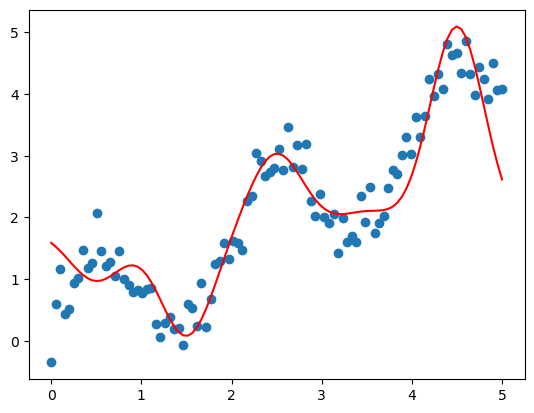

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.81667246 -1.71519005  1.24853183  0.2947726   3.30503407]
interception:  1.7915214616352322


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

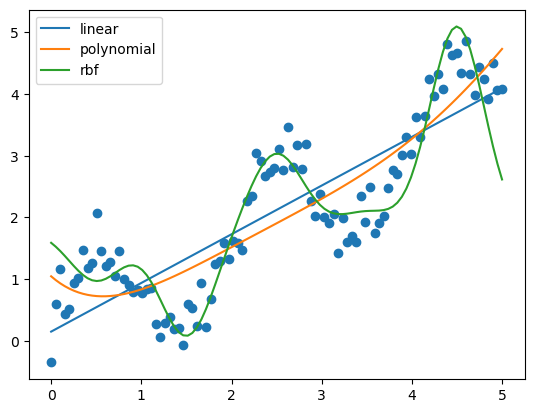

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5154796035813071


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4388885370581184


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2470962242166867
